In [2]:
# Imports here

import os

import numpy as np

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable

import torchvision
from torchvision import datasets, transforms, models

from collections import OrderedDict # https://docs.python.org/3/library/collections.html

import json

import time

from PIL import Image   # https://pillow.readthedocs.io/en/stable/

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



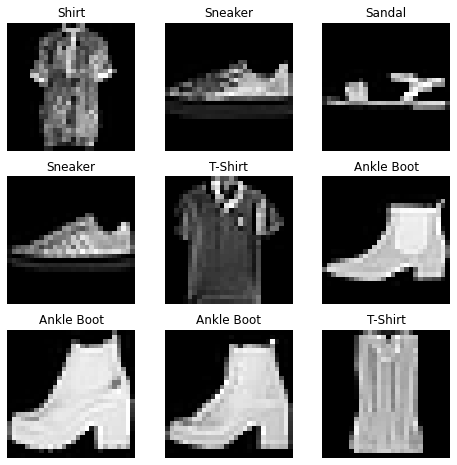

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
# produces paths to data directory
data_dir = '/content/image_classifier_project/data/FashionMNIST/raw'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

print(data_dir)
print(train_dir)
print(valid_dir)
print(test_dir)

# Get the num of classes from the directory
number_train_classes = len(os.listdir(train_dir))
number_valid_classes = len(os.listdir(valid_dir))
number_test_classes = len(os.listdir(test_dir))

print(number_train_classes)
print(number_valid_classes)
print(number_test_classes)

if (number_train_classes != number_valid_classes) or (number_train_classes != number_test_classes) or (number_valid_classes != number_test_classes):
    print('Error: number of train, valid test classes is not the same')
    
number_classes = number_train_classes

In [3]:

degrees_rotation = 30 #54:30
size_crop = 224
size_resize = 256
normalize_mean = [0.485, 0.456, 0.406]  #  normalizing the colors around a point
normalize_std = [0.229, 0.224, 0.225]
batch_size = 32

train_transforms = transforms.Compose([transforms.RandomRotation(degrees_rotation),
                                       transforms.RandomResizedCrop(size_crop),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),  #transfers photos to GPU
                                       transforms.Normalize(normalize_mean, normalize_std)
                                      ])

valid_transforms = transforms.Compose([transforms.Resize(size_resize), 
                                       transforms.CenterCrop(size_crop),
                                       transforms.ToTensor(),
                                       transforms.Normalize(normalize_mean, normalize_std)
                                      ])

test_transforms = transforms.Compose([transforms.Resize(size_resize),
                                      transforms.CenterCrop(size_crop),
                                      transforms.ToTensor(),
                                      transforms.Normalize(normalize_mean, normalize_std)
                                     ])

# TODO: Load the datasets with ImageFolder
#image_datasets = 

train_data = datasets.ImageFolder(train_dir, transform = train_transforms) # טעינת התמונות לאחר הפעלת טרנספורמציות והופך לאובייקט דאטהסט שנקרא טריינדאטה
valid_data = datasets.ImageFolder(valid_dir, transform = valid_transforms)
test_data = datasets.ImageFolder(test_dir, transform = test_transforms)

# TODO: Using the image datasets and the trainforms, define the dataloaders
#dataloaders = 

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size = batch_size)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)

NameError: ignored